In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('BlackFriday.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.dropna().isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']

In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['Product_ID'].nunique()

3623

In [8]:
df['City_Category'].nunique()

3

In [9]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [10]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [11]:
for column in df.columns:
    print(column,df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


In [12]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: xlabel='Age'>

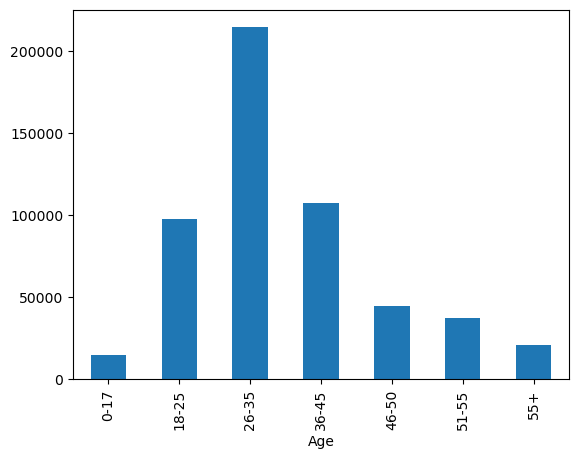

In [13]:
df.groupby('Age').size().plot(kind='bar')

In [14]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

#### number of products in particular age group

In [15]:
len(df[df['Age']=='0-17'])

14707

In [16]:
for i in df['Age'].unique():
    print(i,len(df[df['Age']==i]))

0-17 14707
55+ 20903
26-35 214690
46-50 44526
51-55 37618
36-45 107499
18-25 97634


### number of unique products purchased bythe people of this particular age group

In [17]:
df[df['Age']=='18-25']['Product_ID']

70        P00366542
71        P00190742
72        P00151842
73        P00112642
74        P00118442
            ...    
537566    P00048742
537567    P00157542
537568    P00250642
537569    P00023142
537570    P00162442
Name: Product_ID, Length: 97634, dtype: object

In [18]:
df[df['Age']=='18-25']['Product_ID'].nunique()

3213

In [19]:
for i in df['Age'].unique():
    print(i,df[df['Age']==i]['Product_ID'].nunique())

0-17 2300
55+ 2573
26-35 3419
46-50 3099
51-55 2877
36-45 3318
18-25 3213


In [20]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

In [21]:
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

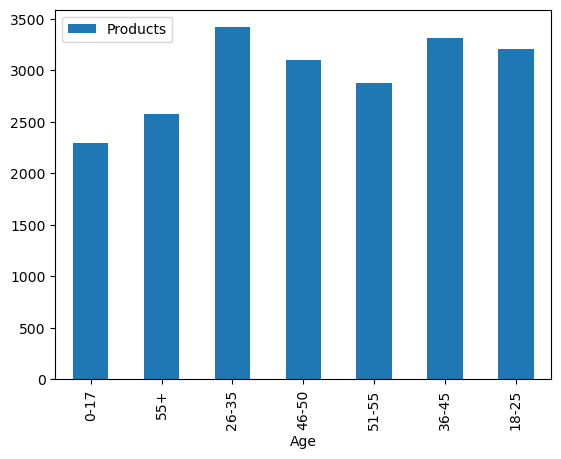

In [22]:
data.plot(kind='bar',x='Age')

In [23]:
df.groupby('Age')['Purchase'].sum()

Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64

<Axes: xlabel='Age'>

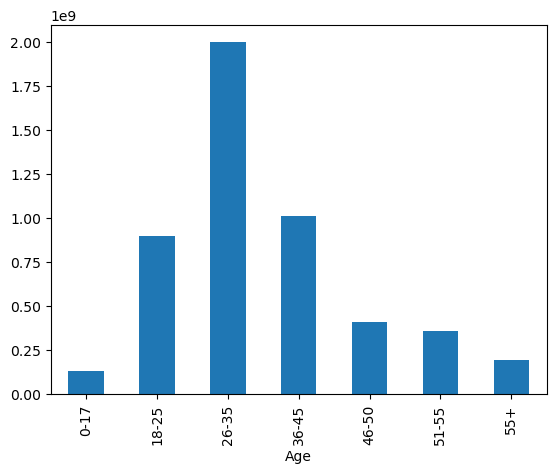

In [24]:
df.groupby('Age')['Purchase'].sum().plot(kind='bar')

In [25]:
df.groupby('Martial_Status').size()['Purchase'].plot(kind='pie')

KeyError: 'Martial_Status'

In [ ]:
sns.countplot(x='Age',hue